Note: this notebook was run using google colab 

## Loading the dataset directly from kaggle:

In [12]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ahmadyasser18","key":"cd9264ecef7361128e46c438d42848cd"}'}

In [14]:
!mkdir ~/.kaggle

In [15]:
!cp "kaggle.json" ~/.kaggle

In [16]:
!chmod 600 ~/.kaggle/kaggle.json

In [17]:
#to list all datasets available in kaggle
! kaggle datasets list

ref                                                            title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
iamsouravbanerjee/world-population-dataset                     World Population Dataset                             17KB  2022-08-31 11:20:04          13106        376  1.0              
narayan63/netflix-popular-movies-dataset                       Netflix popular movies dataset                        1MB  2022-09-24 08:23:22           1236         33  0.9411765        
anushabellam/trending-videos-on-youtube                        Trending videos on Youtube                           29KB  2022-09-20 12:12:35            957         30  1.0              
whenamancodes/student-performance                              St

In [18]:
!kaggle datasets download -d gauravsharma99/fer13-cleaned-dataset

 60% 17.0M/28.2M [00:00<00:00, 24.5MB/s]
100% 28.2M/28.2M [00:00<00:00, 32.9MB/s]


In [19]:
#unzipping the zipped file into the em_dataset folder
!unzip fer13-cleaned-dataset.zip -d em_dataset

Streaming output truncated to the last 5000 lines.
  inflating: em_dataset/Neutral/Training_59186253.jpg  
  inflating: em_dataset/Neutral/Training_59196451.jpg  
  inflating: em_dataset/Neutral/Training_59207899.jpg  
  inflating: em_dataset/Neutral/Training_59231702.jpg  
  inflating: em_dataset/Neutral/Training_59239314.jpg  
  inflating: em_dataset/Neutral/Training_59257029.jpg  
  inflating: em_dataset/Neutral/Training_59262777.jpg  
  inflating: em_dataset/Neutral/Training_5928809.jpg  
  inflating: em_dataset/Neutral/Training_59297234.jpg  
  inflating: em_dataset/Neutral/Training_59301844.jpg  
  inflating: em_dataset/Neutral/Training_59316619.jpg  
  inflating: em_dataset/Neutral/Training_59318324.jpg  
  inflating: em_dataset/Neutral/Training_59349555.jpg  
  inflating: em_dataset/Neutral/Training_5937470.jpg  
  inflating: em_dataset/Neutral/Training_59384298.jpg  
  inflating: em_dataset/Neutral/Training_59428060.jpg  
  inflating: em_dataset/Neutral/Training_59432107.jpg  

#Loading and preparing the data

In [20]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

from os import listdir,getcwd  
from os.path import join

In [21]:
def show(i):                
    cv2.namedWindow("Image", cv2.WINDOW_NORMAL)
    cv2.imshow('Image',i)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [22]:
def get_data(path):
    imgs=[]
    labels=[]

    for l in listdir(path):
        letter=join(path, l)
        for i in listdir(letter):
            img_path=join(letter,i)
            img=cv2.imread(img_path,0)
            img=cv2.resize(img,(48,48),interpolation=cv2.INTER_CUBIC)
            imgs.append(img)
            labels.append(l)
    
    imgs=np.array(imgs,dtype=np.uint8)
    imgs=imgs.flatten()
    imgs=imgs.reshape(-1,48,48,1)
    return imgs,labels

In [23]:
for l in listdir('em_dataset'):
        letter=join('em_dataset', l)
        for i in listdir(letter):
            img_path=join(letter,i)
            img=cv2.imread(img_path,0)
            print(img.shape)
            break

(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)


In [24]:
x,y=get_data('em_dataset')

In [25]:
x.shape

(16876, 48, 48, 1)

In [26]:
len(y)

16876

fear


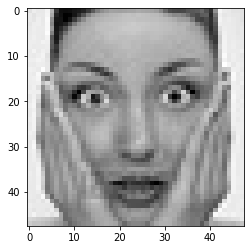

In [27]:
print(y[1000])
plt.imshow(x[1000].reshape(48,48),cmap='gray')

Neutral


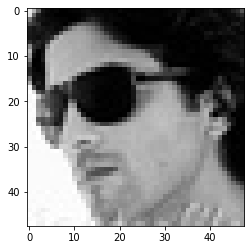

In [28]:
print(y[-1])
plt.imshow(x[-1].reshape(48,48),cmap='gray')

In [29]:
#Normalizing 
x= x/255

In [30]:
from sklearn.preprocessing import LabelBinarizer
label_binrizer = LabelBinarizer()

In [31]:
y = label_binrizer.fit_transform(y)

In [32]:
print('x shape: ',x.shape,'\ny shape: ', y.shape)

x shape:  (16876, 48, 48, 1) 
y shape:  (16876, 5)


In [46]:
y_classes=label_binrizer.classes_

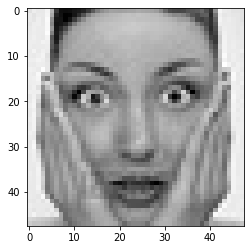

In [47]:
y_classes[np.argmax(y[1000])]

plt.imshow(x[1000].reshape(48,48),cmap='gray')

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print("x_train shape",X_train.shape)
print("x_test shape",X_test.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_test.shape)

x_train shape (13500, 48, 48, 1)
x_test shape (3376, 48, 48, 1)
y_train shape (13500, 5)
y_test shape (3376, 5)


Happy


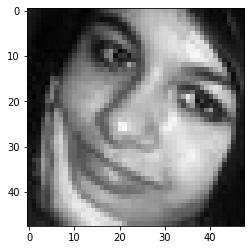

In [36]:
plt.imshow(X_test[50].reshape(48,48),cmap="gray")
print(label_binrizer.classes_[np.argmax(Y_test[50])])

# Building the model

In [37]:
from sklearn.metrics import confusion_matrix
import itertools
import tensorflow as tf

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

from keras.callbacks import ReduceLROnPlateau

In [38]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [39]:
tf.keras.backend.clear_session()

In [ ]:
tf.Graph().as_default()

In [51]:
model = tf.keras.models.Sequential([
                        tf.keras.layers.Conv2D(64, kernel_size=3, activation='relu',padding = 'same', input_shape=(48,48, 1)),
                        tf.keras.layers.MaxPooling2D(2, 2),
                        tf.keras.layers.Dropout(0.2),
    
                        tf.keras.layers.Conv2D(128, (3, 3),padding = 'same', activation='relu'),
                        tf.keras.layers.MaxPooling2D(2, 2),
                        tf.keras.layers.BatchNormalization(),
                        tf.keras.layers.Dropout(0.2),
    
                        tf.keras.layers.Conv2D(256, (3, 3),padding = 'same', activation='relu'),
                        tf.keras.layers.MaxPooling2D(2, 2),
                        tf.keras.layers.BatchNormalization(),
                        tf.keras.layers.Dropout(0.2),
                        
                        tf.keras.layers.Conv2D(512, (3, 3),padding = 'same', activation='relu'),
                        tf.keras.layers.MaxPooling2D(2, 2),
                        tf.keras.layers.BatchNormalization(),
                        tf.keras.layers.Dropout(0.2),

                        tf.keras.layers.Flatten(),
    
                        tf.keras.layers.Dense(512, activation='relu'),
                        tf.keras.layers.Dense(len(y_classes), activation='softmax')])
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 48, 48, 64)        640       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 24, 24, 64)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 24, 24, 128)       73856     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 12, 12, 128)      0         
 2D)                                                             
                                                                 
 batch_normalization_6 (Batc  (None, 12, 12, 128)     

In [59]:
#optimizer = Adam(lr=0.003, beta_1=0.9, beta_2=0.999)

model.compile( optimizer='rmsprop' , loss = "categorical_crossentropy", metrics=["accuracy"])

In [66]:
epochs = 50
batch_size = 225

In [61]:
from keras.preprocessing.image import ImageDataGenerator

In [62]:
#Data augmentation
datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False,  
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False, 
        zca_whitening=False,
        rotation_range=15, 
        zoom_range = 0.5,
        width_shift_range=0.15,  
        height_shift_range=0.15, 
        horizontal_flip=True,  
        vertical_flip=False)  

datagen.fit(X_train)

In [67]:
history = model.fit(datagen.flow(X_train,Y_train, batch_size=batch_size),epochs = epochs, validation_data = (X_test,Y_test), steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/50
60/60 [==============================] - 7s 108ms/step - loss: 0.6888 - accuracy: 0.7413 - val_loss: 0.7354 - val_accuracy: 0.7580
Epoch 2/50
60/60 [==============================] - 6s 93ms/step - loss: 0.6919 - accuracy: 0.7329 - val_loss: 0.6974 - val_accuracy: 0.7547
Epoch 3/50
60/60 [==============================] - 6s 98ms/step - loss: 0.6836 - accuracy: 0.7416 - val_loss: 0.7241 - val_accuracy: 0.7500
Epoch 4/50
60/60 [==============================] - 6s 99ms/step - loss: 0.6842 - accuracy: 0.7442 - val_loss: 0.7920 - val_accuracy: 0.7287
Epoch 5/50
60/60 [==============================] - 6s 98ms/step - loss: 0.6977 - accuracy: 0.7341 - val_loss: 0.8070 - val_accuracy: 0.7275
Epoch 6/50
60/60 [==============================] - 6s 97ms/step - loss: 0.6788 - accuracy: 0.7446 - val_loss: 0.8584 - val_accuracy: 0.7210
Epoch 7/50
60/60 [==============================] - 6s 96ms/step - loss: 0.6976 - accuracy: 0.7344 - val_loss: 0.8225 - val_accuracy: 0.7236
Epoch 8/50
6

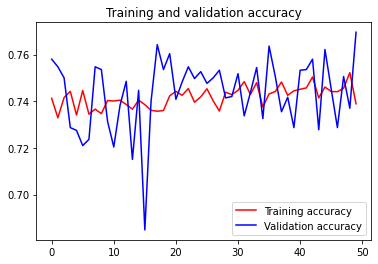

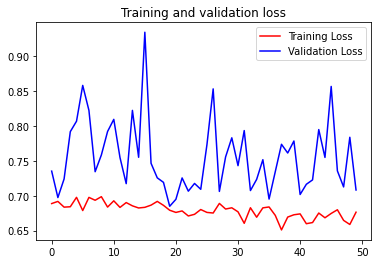

In [68]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [69]:
#Saving the model
model.save('em_model.h5')

#### Checking performance using the test data

In [77]:
y_pred=model.predict(X_test)

In [78]:
y_pred=y_pred.round()

In [79]:
y_pred.shape

(3376, 5)

In [81]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_test,y_pred)

0.7360781990521327